In [110]:
import torch
import torch.nn
import torch.optim

import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
train_df.info

<bound method DataFrame.info of     PRODUCT_ID  Y_Class  Y_Quality         TIMESTAMP     LINE PRODUCT_CODE  \
0    TRAIN_000        1   0.533433   2022-06-13 5:14  T050304         A_31   
1    TRAIN_001        2   0.541819   2022-06-13 5:22  T050307         A_31   
2    TRAIN_002        1   0.531267   2022-06-13 5:30  T050304         A_31   
3    TRAIN_003        2   0.537325   2022-06-13 5:39  T050307         A_31   
4    TRAIN_004        1   0.531590   2022-06-13 5:47  T050304         A_31   
..         ...      ...        ...               ...      ...          ...   
593  TRAIN_593        1   0.526546  2022-09-08 14:30  T100306         T_31   
594  TRAIN_594        0   0.524022  2022-09-08 22:38  T050304         A_31   
595  TRAIN_595        0   0.521289  2022-09-08 22:47  T050304         A_31   
596  TRAIN_596        1   0.531375  2022-09-08 14:38  T100304         O_31   
597  TRAIN_597        1   0.533702  2022-09-08 14:46  T100306         O_31   

      X_1   X_2  X_3   X_4  ...

In [ ]:
train_df.describe()

,Y_Class,Y_Quality,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
count,598.000000,598.000000,349.000000,349.000000,349.0,349.0,349.000000,349.0,349.000000,349.000000,...,100.000000,100.00000,100.000000,100.000000,100.00000,99.0,0.0,0.0,0.0,0.0
mean,1.025084,0.530896,2.409742,95.123209,0.0,45.0,10.392550,0.0,48.802292,10.048711,...,50.807300,53.60770,49.606200,51.659800,66.64970,1.0,NaN,NaN,NaN,NaN
std,0.565069,0.007401,5.895256,4.107640,0.0,0.0,0.489019,0.0,4.373824,0.215571,...,7.011828,8.13899,7.158917,8.913065,4.52781,0.0,NaN,NaN,NaN,NaN
min,0.000000,0.500856,1.000000,87.000000,0.0,45.0,10.000000,0.0,45.000000,10.000000,...,32.120000,31.70000,32.560000,30.490000,61.67000,1.0,NaN,NaN,NaN,NaN
25%,1.000000,0.527535,2.000000,93.000000,0.0,45.0,10.000000,0.0,45.000000,10.000000,...,49.485000,52.20000,42.160000,49.915000,63.64500,1.0,NaN,NaN,NaN,NaN
50%,1.000000,0.530436,2.000000,95.000000,0.0,45.0,10.000000,0.0,45.000000,10.000000,...,53.425000,55.92500,51.460000,56.175000,65.14000,1.0,NaN,NaN,NaN,NaN
75%,1.000000,0.533433,2.000000,98.000000,0.0,45.0,11.000000,0.0,51.000000,10.000000,...,55.287500,58.97500,55.030000,57.175000,67.11500,1.0,NaN,NaN,NaN,NaN
max,2.000000,0.578841,103.000000,102.000000,0.0,45.0,11.000000,0.0,62.000000,11.000000,...,60.240000,68.66000,60.410000,59.930000,79.75000,1.0,NaN,NaN,NaN,NaN


In [ ]:
"""
  usable sample column
  Label : Y_Quality
  Samples : Product_code , x_n, Line, timestamp

"""
train_df.head()

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TRAIN_000,1,0.533433,2022-06-13 5:14,T050304,A_31,NaN,NaN,NaN,NaN,...,39.34,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN
1,TRAIN_001,2,0.541819,2022-06-13 5:22,T050307,A_31,NaN,NaN,NaN,NaN,...,38.89,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN
2,TRAIN_002,1,0.531267,2022-06-13 5:30,T050304,A_31,NaN,NaN,NaN,NaN,...,39.19,36.65,42.47,36.53,78.35,NaN,NaN,NaN,NaN,NaN
3,TRAIN_003,2,0.537325,2022-06-13 5:39,T050307,A_31,NaN,NaN,NaN,NaN,...,37.74,39.17,52.17,30.58,71.78,NaN,NaN,NaN,NaN,NaN
4,TRAIN_004,1,0.531590,2022-06-13 5:47,T050304,A_31,NaN,NaN,NaN,NaN,...,38.70,41.89,46.93,33.09,76.97,NaN,NaN,NaN,NaN,NaN


## train.csv
PRODUCT_ID : 제품의 고유 ID  
Y_Class : 제품 품질 상태(Target)   
0 : 적정 기준 미달 (부적합)  
1 : 적합  
2 : 적정 기준 초과 (부적합)  
Y_Quality : 제품 품질 관련 정량적 수치  
TIMESTAMP : 제품이 공정에 들어간 시각  
LINE : 제품이 들어간 공정 LINE 종류 ('T050304', 'T050307', 'T100304','T100306' 'T010306', 'T010305' 존재)   
PRODUCT_CODE : 제품의 CODE 번호 ('A_31', 'T_31', 'O_31' 존재)  
X_1 ~ X_2875 : 공정 과정에서 추출되어 비식별화된 변수  

In [42]:
"""
  class 0 : ~ 0.525067
  class 1 : 0.530253 ~ 0.534843
  class 2 : 0.534843 ~ 
"""

quality_df = train_df.loc[:,['Y_Class','Y_Quality']]
quality_group = quality_df.groupby('Y_Class').describe()
quality_group.head()

Y_Quality                                                              \
            count      mean       std       min       25%       50%       75%   
Y_Class                                                                         
0            88.0  0.520837  0.004603  0.500856  0.519440  0.522054  0.524113   
1           407.0  0.530253  0.002444  0.525086  0.528378  0.530308  0.532129   
2           103.0  0.542031  0.008038  0.534951  0.536354  0.538508  0.546555   

                   
              max  
Y_Class            
0        0.525067  
1        0.534843  
2        0.578841

In [20]:
columns_list = train_df.columns.tolist()
print(columns_list)

['PRODUCT_ID', 'Y_Class', 'Y_Quality', 'TIMESTAMP', 'LINE', 'PRODUCT_CODE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'X_16', 'X_17', 'X_18', 'X_19', 'X_20', 'X_21', 'X_22', 'X_23', 'X_24', 'X_25', 'X_26', 'X_27', 'X_28', 'X_29', 'X_30', 'X_31', 'X_32', 'X_33', 'X_34', 'X_35', 'X_36', 'X_37', 'X_38', 'X_39', 'X_40', 'X_41', 'X_42', 'X_43', 'X_44', 'X_45', 'X_46', 'X_47', 'X_48', 'X_49', 'X_50', 'X_51', 'X_52', 'X_53', 'X_54', 'X_55', 'X_56', 'X_57', 'X_58', 'X_59', 'X_60', 'X_61', 'X_62', 'X_63', 'X_64', 'X_65', 'X_66', 'X_67', 'X_68', 'X_69', 'X_70', 'X_71', 'X_72', 'X_73', 'X_74', 'X_75', 'X_76', 'X_77', 'X_78', 'X_79', 'X_80', 'X_81', 'X_82', 'X_83', 'X_84', 'X_85', 'X_86', 'X_87', 'X_88', 'X_89', 'X_90', 'X_91', 'X_92', 'X_93', 'X_94', 'X_95', 'X_96', 'X_97', 'X_98', 'X_99', 'X_100', 'X_101', 'X_102', 'X_103', 'X_104', 'X_105', 'X_106', 'X_107', 'X_108', 'X_109', 'X_110', 'X_111', 'X_112', 'X_113', 'X_114', 'X_115

In [40]:
"""
  count가 0인 X 변수 제거
"""
count_0 = []
for column in columns_list:
  if train_df[column].count() == 0.0:
    count_0.append(column)
print("Count 0 columns : ", count_0)
print("Size of count 0 columns : ", len(count_0))

train_nonzero_df = train_df.drop(count_0,axis = 1)
train_nonzero_df.describe()

print("Dataframe shape : \n\tRow Size : {}\n\tColumn SIze : {}".format(train_nonzero_df.shape[0], train_nonzero_df.shape[1]))

Count 0 columns :  ['X_934', 'X_935', 'X_936', 'X_937', 'X_2628', 'X_2629', 'X_2630', 'X_2631', 'X_2632', 'X_2633', 'X_2634', 'X_2635', 'X_2636', 'X_2637', 'X_2638', 'X_2639', 'X_2640', 'X_2641', 'X_2642', 'X_2643', 'X_2644', 'X_2645', 'X_2646', 'X_2647', 'X_2648', 'X_2649', 'X_2650', 'X_2651', 'X_2652', 'X_2653', 'X_2654', 'X_2655', 'X_2656', 'X_2657', 'X_2658', 'X_2659', 'X_2660', 'X_2661', 'X_2662', 'X_2663', 'X_2664', 'X_2665', 'X_2666', 'X_2667', 'X_2668', 'X_2669', 'X_2670', 'X_2671', 'X_2672', 'X_2673', 'X_2674', 'X_2675', 'X_2676', 'X_2677', 'X_2678', 'X_2679', 'X_2680', 'X_2681', 'X_2682', 'X_2683', 'X_2684', 'X_2685', 'X_2686', 'X_2687', 'X_2688', 'X_2689', 'X_2690', 'X_2691', 'X_2692', 'X_2693', 'X_2694', 'X_2695', 'X_2696', 'X_2697', 'X_2698', 'X_2699', 'X_2838', 'X_2844', 'X_2872', 'X_2873', 'X_2874', 'X_2875']
Size of count 0 columns :  82
Dataframe shape : 
	Row Size : 598
	Column SIze : 2799


#Product Code 기준

In [62]:
"""
  PRODUCT_CODE를 기준으로 데이터 describe
"""
code_df = train_nonzero_df.drop(['Y_Quality','Y_Class','LINE','TIMESTAMP','PRODUCT_ID'],axis = 1)
code_df = code_df.groupby('PRODUCT_CODE').describe()
code_df.head()

X_1                                                       X_2  \
              count       mean        std  min  25%  50%    75%    max  count   
PRODUCT_CODE                                                                    
A_31            0.0        NaN        NaN  NaN  NaN  NaN    NaN    NaN    0.0   
O_31            6.0  13.500000  14.501724  4.0  4.5  6.0  17.25   40.0    6.0   
T_31          343.0   2.215743   5.485770  1.0  2.0  2.0   2.00  103.0  343.0   

                        ...  X_2870        X_2871                           \
                  mean  ...     75%    max  count mean  std  min  25%  50%   
PRODUCT_CODE            ...                                                  
A_31               NaN  ...  67.115  79.75   99.0  1.0  0.0  1.0  1.0  1.0   
O_31          93.00000  ...     NaN    NaN    0.0  NaN  NaN  NaN  NaN  NaN   
T_31          95.16035  ...     NaN    NaN    0.0  NaN  NaN  NaN  NaN  NaN   

                        
              75%  max  
PRODUCT_CODE            
A_31          1.0  1.0  
O_31          NaN  NaN  
T_31          NaN  NaN  

[3 rows x 22344 columns]

In [94]:
name_list = code_df.columns.tolist()
code_df_list = code_df.fillna(-1).values
print(len(code_df_list))

3


In [156]:
#reshape size
reshape_size = 100
print(len(code_df_list[0]))
tmp1 = code_df_list[0]
tmp1 = tmp1[:22000]
tmp1_reshape = tmp1.reshape(-1,reshape_size)

mm1 = MinMaxScaler()
mm1_data = mm1.fit_transform(tmp1_reshape)


tmp2 = code_df_list[1]
print(len(tmp2))
tmp2 = tmp2[:22000]
tmp2_reshape = tmp2.reshape(-1,reshape_size)

mm2 = MinMaxScaler()
mm2_data = mm2.fit_transform(tmp2_reshape)

tmp3 = code_df_list[2]
print(len(tmp3))
tmp3 = tmp3[:22000]
tmp3_reshape = tmp3.reshape(-1,reshape_size)


mm3 = MinMaxScaler()
mm3_data = mm3.fit_transform(tmp3_reshape)

22344
22344
22344


In [162]:
#transpose matrix
mm1_data = np.transpose(mm1_data)
mm2_data = np.transpose(mm2_data)
mm3_data = np.transpose(mm3_data)

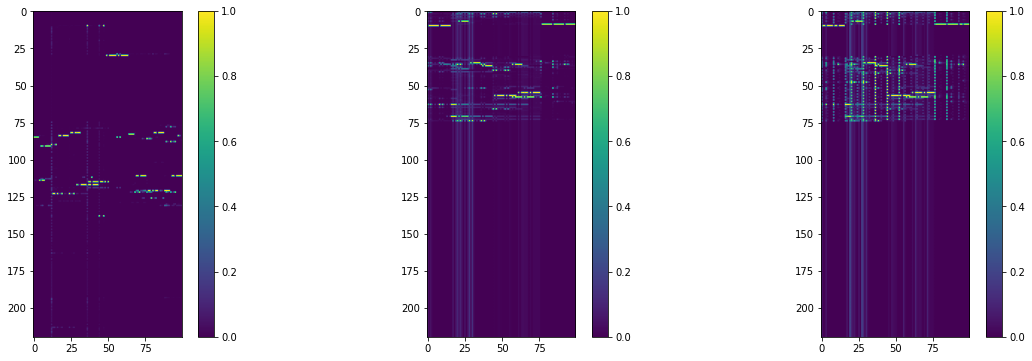

In [164]:
"""
   파란색 부분은 전부 데이터가 0.0인 지점
   0.0일 때 전처리 필요
   transpose 안 한 상태 기준으로
    가로  X_1 -> X_K 순으로 
"""
plt.figure(figsize = (20,6))
plt.subplot(1,3,1)
plt.imshow(mm1_data)
plt.colorbar()

plt.subplot(1,3,2)
plt.imshow(mm2_data)
plt.colorbar()

plt.subplot(1,3,3)
plt.imshow(mm3_data)
plt.colorbar()
plt.show()

#Line Code 기준

In [165]:
"""
  PRODUCT_CODE를 기준으로 데이터 describe
"""
code_df = train_nonzero_df.drop(['Y_Quality','Y_Class','PRODUCT_CODE','TIMESTAMP','PRODUCT_ID'],axis = 1)
code_df = code_df.groupby('LINE').describe()
code_df.head()

X_1                                               X_2             \
         count  mean       std  min  25%  50%  75%    max  count       mean   
LINE                                                                          
T010305    0.0   NaN       NaN  NaN  NaN  NaN  NaN    NaN    0.0        NaN   
T010306    0.0   NaN       NaN  NaN  NaN  NaN  NaN    NaN    0.0        NaN   
T050304    0.0   NaN       NaN  NaN  NaN  NaN  NaN    NaN    0.0        NaN   
T050307    0.0   NaN       NaN  NaN  NaN  NaN  NaN    NaN    0.0        NaN   
T100304  175.0  2.72  8.172452  1.0  2.0  2.0  2.0  103.0  175.0  97.994286   

         ... X_2870        X_2871                                     
         ...    75%    max  count mean  std  min  25%  50%  75%  max  
LINE     ...                                                          
T010305  ...    NaN    NaN    0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
T010306  ...    NaN    NaN    0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
T050304  ...  66.84  79.75   67.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
T050307  ...  71.37  72.77   32.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
T100304  ...    NaN    NaN    0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 22344 columns]

In [166]:
name_list = code_df.columns.tolist()
code_df_list = code_df.fillna(-1).values
print(len(code_df_list))

6


In [168]:
#reshape size
reshape_size = 100
scaled_list = []
for df in code_df_list:
  print(len(df))
  tmp = df
  tmp = tmp[:22000]
  tmp_reshape = tmp.reshape(-1,reshape_size)

  mm = MinMaxScaler()
  mm_data = mm.fit_transform(tmp_reshape)
  scaled_list.append(mm_data)

22344
22344
22344
22344
22344
22344


In [ ]:
#transpose matrix
for df in scaled_list:
  df = np.transpose(df)

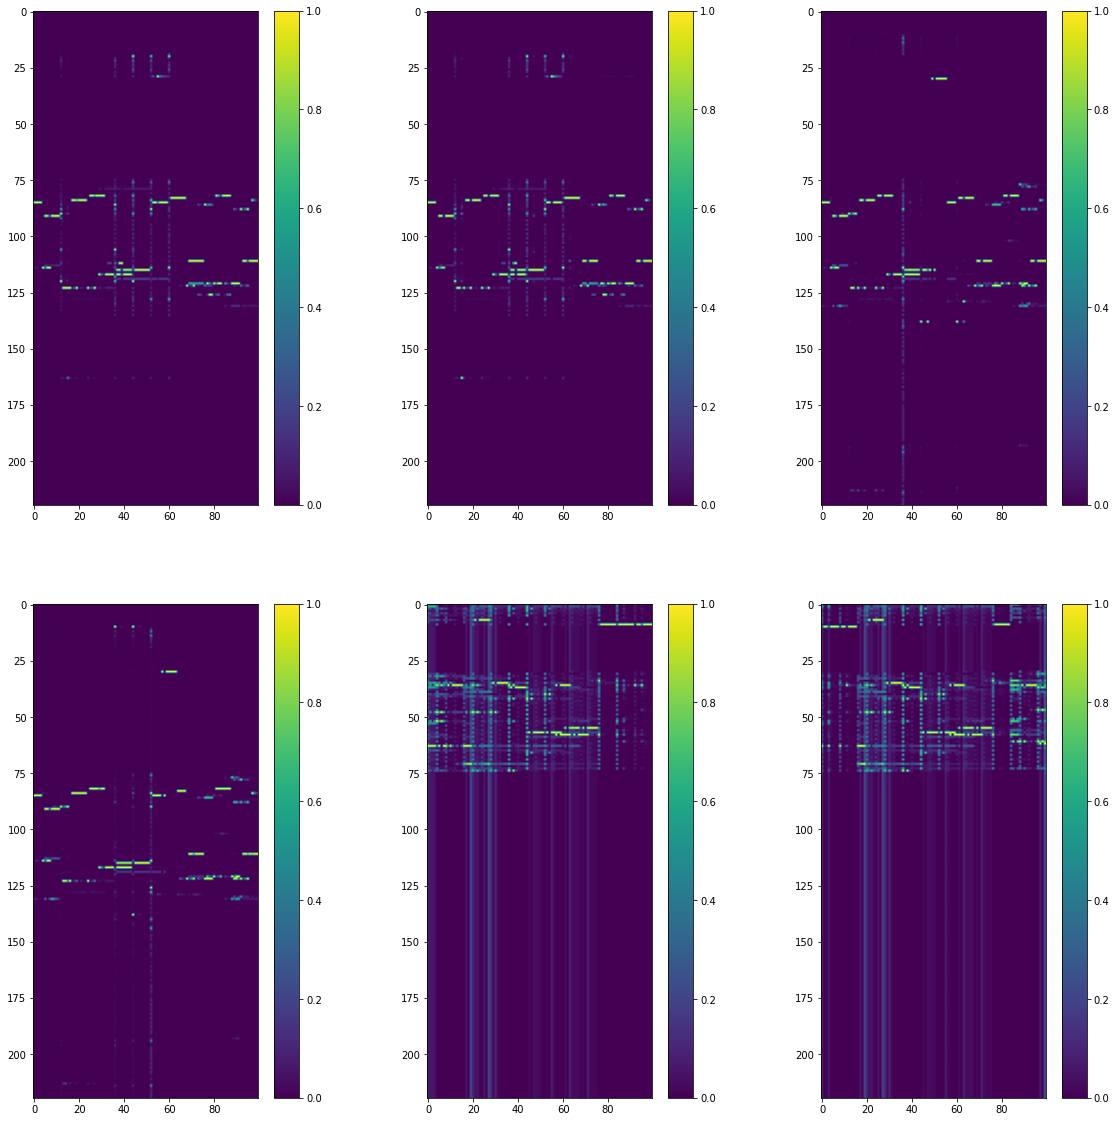

In [171]:
"""
   파란색 부분은 전부 데이터가 0.0인 지점
   0.0일 때 전처리 필요
   transpose 안 한 상태 기준으로
    가로  X_1 -> X_K 순으로 
"""
plt.figure(figsize = (20,20))

for i ,df in enumerate(scaled_list):
  plt.subplot(len(scaled_list)//3,3,i+1)
  plt.imshow(scaled_list[i])
  plt.colorbar()
plt.show()